In [2]:
mp_pdf = False
import sys, os
if mp_pdf:
    extension = "pdf"
    import matplotlib
    matplotlib.use('pgf')
    pgf_with_latex = {
        "text.usetex": True,            # use LaTeX to write all text
        "pgf.rcfonts": False,           # Ignore Matplotlibrc
        "text.latex.unicode": True,
        "pgf.preamble": [
            #r"\usepackage[utf8x]{inputenc}",
            r"\usepackage{xcolor}"
        ],
        "pgf.texsystem" : "xelatex",
        "figure.figsize": [12,7]
    }
    matplotlib.rcParams.update(pgf_with_latex)
else:
    extension = "png"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from adjustText import adjust_text, get_renderer, get_bboxes

In [3]:
mdf = pd.read_csv('../tables/newness_representation.csv')
mdf.head()

,ipcc_coverage,ipcc_score,ipcc_share,primary_wg,score,share,title,deviation,abs_md,representation,ys,year_av,lrep,x_q,y_q
0,0.157020,23.672996,0.008515,1,278.090374,0.007036,"{solar, radiation, irradiance}",0.001479,0.001479,1.210228,0.464374,4.423077,0.190809,1,4
1,0.061647,5.939852,0.002137,3,217.785654,0.005510,"{soc, stock, soil}",-0.003374,0.003374,0.387745,0.428359,4.630435,-0.947407,4,0
2,0.184676,51.188802,0.018413,1,511.399768,0.012939,"{temperature, warm, air}",0.005474,0.005474,1.423031,0.457723,4.470588,0.352789,1,4
3,0.143765,13.669805,0.004917,2,187.789378,0.004751,"{fire, burn, wildfire}",0.000166,0.000166,1.034883,0.470071,4.568627,0.034288,3,3
4,0.068352,11.129064,0.004003,2,301.599330,0.007631,"{lake, level, diatom}",-0.003628,0.003628,0.524600,0.483940,4.425926,-0.645120,1,1


In [4]:
topic_dis_df = pd.read_csv('../tables/topic_discipline.csv')
topic_dis_df = topic_dis_df.rename(columns={"dis_share":"dis_score"})

topic_dis_df['dis_total'] = topic_dis_df.groupby('title')['dis_score'].transform('sum')

topic_dis_df['dis_share'] = topic_dis_df['dis_score'] / topic_dis_df['dis_total']

topic_dis_df.head()

,dis_score,doctopic__doc__wc__oecd,primary_wg,title,dis_total,dis_share
0,40.160252,Agricultural Sciences,2,"{adaptation, vulnerability, farmer}",422.856596,0.094974
1,13.444909,Agricultural Sciences,2,"{adsorption, capacity, adsorbent}",316.221218,0.042517
2,5.938442,Agricultural Sciences,1,"{aerosol, forcing, radiative}",253.744444,0.023403
3,15.398295,Agricultural Sciences,1,"{arctic, warm, tundra}",386.863329,0.039803
4,68.393232,Agricultural Sciences,2,"{area, region, distribution}",720.605653,0.094911


In [5]:
topic_dis_wide = topic_dis_df.pivot_table(
    index=["title"],columns="doctopic__doc__wc__oecd",values="dis_share"
).reset_index()

topic_dis_wide.head()

doctopic__doc__wc__oecd,title,Agricultural Sciences,Engineering and Technology,Humanities,Medical and Health Sciences,Natural Sciences,Social Sciences
0,"{adaptation, vulnerability, farmer}",0.094974,0.117893,0.006440,0.017409,0.530568,0.230353
1,"{adsorption, capacity, adsorbent}",0.042517,0.372730,0.001865,0.004678,0.549834,0.026996
2,"{aerosol, forcing, radiative}",0.023403,0.164013,0.002101,0.004009,0.785627,0.020331
3,"{arctic, warm, tundra}",0.039803,0.077289,0.004430,0.008271,0.826665,0.042920
4,"{area, region, distribution}",0.094911,0.159346,0.004530,0.014595,0.660921,0.064586


In [6]:
df = pd.concat([mdf.sort_values('title').reset_index(drop=True),topic_dis_wide.sort_values('title').reset_index(drop=True)],axis=1)
df = pd.merge(mdf, topic_dis_wide)
df.head()

,ipcc_coverage,ipcc_score,ipcc_share,primary_wg,score,share,title,deviation,abs_md,representation,...,year_av,lrep,x_q,y_q,Agricultural Sciences,Engineering and Technology,Humanities,Medical and Health Sciences,Natural Sciences,Social Sciences
0,0.157020,23.672996,0.008515,1,278.090374,0.007036,"{solar, radiation, irradiance}",0.001479,0.001479,1.210228,...,4.423077,0.190809,1,4,0.032884,0.403613,0.004865,0.004484,0.512019,0.040386
1,0.061647,5.939852,0.002137,3,217.785654,0.005510,"{soc, stock, soil}",-0.003374,0.003374,0.387745,...,4.630435,-0.947407,4,0,0.395062,0.074729,0.000982,0.002597,0.500715,0.025606
2,0.184676,51.188802,0.018413,1,511.399768,0.012939,"{temperature, warm, air}",0.005474,0.005474,1.423031,...,4.470588,0.352789,1,4,0.093542,0.152891,0.001584,0.018339,0.711020,0.021949
3,0.143765,13.669805,0.004917,2,187.789378,0.004751,"{fire, burn, wildfire}",0.000166,0.000166,1.034883,...,4.568627,0.034288,3,3,0.170628,0.132989,0.002832,0.004495,0.654307,0.033873
4,0.068352,11.129064,0.004003,2,301.599330,0.007631,"{lake, level, diatom}",-0.003628,0.003628,0.524600,...,4.425926,-0.645120,1,1,0.034334,0.079767,0.002689,0.002655,0.864124,0.016208


6

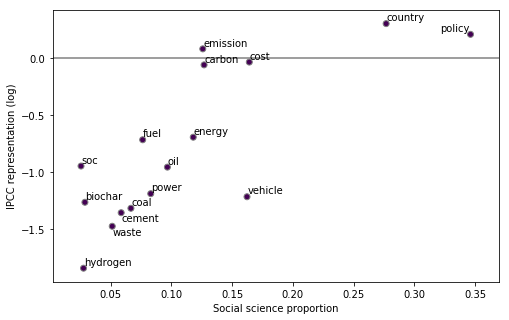

In [11]:
pdf = df[df['primary_wg']==3]

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(
    pdf['Social Sciences'], 
    pdf['lrep'],
    c="#8da0cb",
    linewidths=1,
    edgecolors="grey"
)
texts = []
for i, row in pdf.iterrows():
    stext = row['title'].split(',')[0].replace('{','')
    texts.append(ax.text(row['Social Sciences'], row['lrep'], stext))

ax.axhline(0,c="grey")
ax.set_xlabel("Social science proportion")
ax.set_ylabel("IPCC representation (log)")

adjust_text(texts)

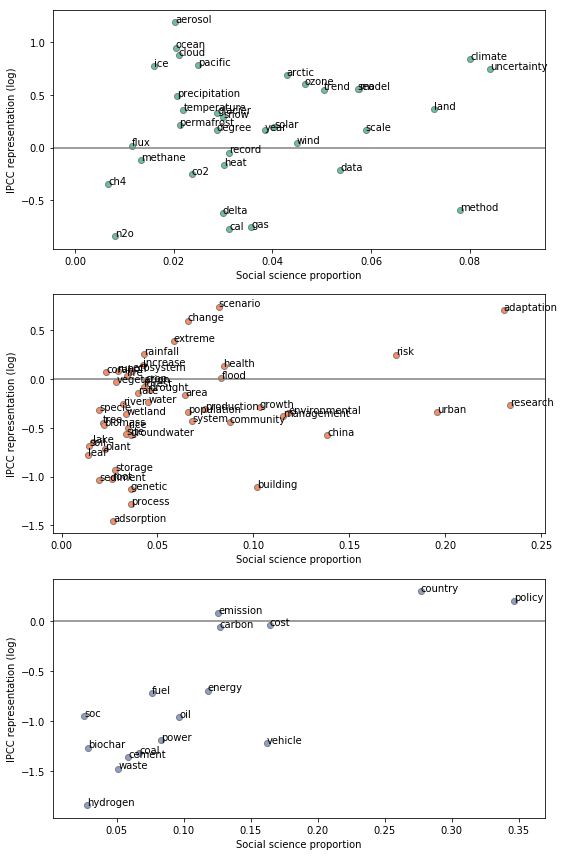

In [16]:
fig, axs = plt.subplots(3,figsize=(8,12))
colors=["#66c2a5","#fc8d62","#8da0cb"]
for wg in [1,2,3]:
    
    ax = axs[wg-1]

    pdf = df[df['primary_wg']==wg]

    ax.scatter(
        pdf['Social Sciences'], 
        pdf['lrep'],
        c=colors[wg-1],
        linewidths=1,
        edgecolors="grey"
    )
    texts = []
    for i, row in pdf.iterrows():
        stext = row['title'].split(',')[0].replace('{','')
        texts.append(ax.text(row['Social Sciences'], row['lrep'], stext))

    ax.axhline(0,c="grey")
    ax.set_xlabel("Social science proportion")
    ax.set_ylabel("IPCC representation (log)")

    #adjust_text(texts)
    
fig.tight_layout()

plt.show()